In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ls.config.loader import load_config
import IPython.display as ipd
import torch

In [3]:
# --- 1. load config ---
cfg = load_config("../configs/config.yaml")

print("Dataset config:", cfg.dataset)
print("Audio config:", cfg.audio)

Dataset config: {'name': 'icbhi', 'data_folder': '/Users/gkont/Downloads/Datasets/icbhi_dataset', 'class_split': 'lungsound', 'split_strategy': 'official', 'test_fold': 0, 'n_cls': 4, 'weighted_sampler': True, 'batch_size': 32, 'num_workers': 0, 'h': 128, 'w': 1024}
Audio config: {'sample_rate': 16000, 'desired_length': 10.0, 'pad_type': 'repeat', 'use_fade': True, 'fade_samples_ratio': 64, 'n_mels': 128, 'frame_length': 40, 'frame_shift': 10, 'low_freq': 0, 'high_freq': 8000, 'window_type': 'hanning', 'use_energy': False, 'dither': 0.0, 'mel_norm': 'hf', 'resz': 1.0, 'raw_augment': 1, 'wave_aug': [{'type': 'Crop', 'sampling_rate': 16000, 'zone': [0.0, 1.0], 'coverage': 1.0, 'p': 0.0}, {'type': 'Noise', 'color': 'white', 'p': 0.0}, {'type': 'Speed', 'factor': [0.9, 1.1], 'p': 0.0}, {'type': 'Loudness', 'factor': [0.5, 2.0], 'p': 0.1}, {'type': 'VTLP', 'sampling_rate': 16000, 'zone': [0.0, 1.0], 'fhi': 4800, 'factor': [0.9, 1.1], 'p': 0.1}, {'type': 'Pitch', 'sampling_rate': 16000, 'fac

## Test DataLoaders

### ICBHI Dataloader using only test set as the validation set

In [ ]:
# # Regular training
from ls.data.dataloaders import build_dataloaders

train_loader, test_loader = build_dataloaders(cfg.dataset, cfg.audio)

[Transforms] Input spectrogram resize factor: 1.0, target size: (128, 1024)
[Transforms] Input spectrogram resize factor: 1.0, target size: (128, 1024)


/opt/homebrew/Caskroom/miniconda/base/envs/icbhi-ast/lib/python3.11/site-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(


[ICBHI] Extracted 4142 respiratory cycles from 539 recordings
[ICBHI] Input spectrogram shape: (997, 128, 1)
[ICBHI] 4142 cycles (base cycles only, aug handled dynamically)
  Class 0: 2063 (49.8%)
  Class 1: 1215 (29.3%)
  Class 2: 501 (12.1%)
  Class 3: 363 (8.8%)
[ICBHI] Active waveform augmentations: Loudness, VTLP
[ICBHI] Active spectrogram augmentations: SpecAugment
[ICBHI] Expected P(augmented) ≈ 0.43 (~1793/4142 per epoch)


/opt/homebrew/Caskroom/miniconda/base/envs/icbhi-ast/lib/python3.11/site-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(


[ICBHI] Extracted 2756 respiratory cycles from 381 recordings
[ICBHI] Input spectrogram shape: (997, 128, 1)
[ICBHI] 2756 cycles (base cycles only, aug handled dynamically)
  Class 0: 1579 (57.3%)
  Class 1: 649 (23.5%)
  Class 2: 385 (14.0%)
  Class 3: 143 (5.2%)
[ICBHI] No waveform augmentations
[ICBHI] No spectrogram augmentations


In [6]:
for batch in train_loader:
    print(batch["input_values"].shape, batch["label"].shape, batch["filename"])
    break

/opt/homebrew/Caskroom/miniconda/base/envs/icbhi-ast/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


torch.Size([32, 1, 128, 1024]) torch.Size([32]) ['221_2b3_Al_mc_LittC2SE', '140_2b3_Ll_mc_LittC2SE', '201_1b3_Al_sc_Meditron', '166_1p1_Al_sc_Meditron', '130_2p3_Pl_mc_AKGC417L', '141_1b3_Al_mc_LittC2SE', '107_2b3_Ar_mc_AKGC417L', '140_2b3_Tc_mc_LittC2SE', '162_2b3_Ar_mc_AKGC417L', '203_1p4_Pl_mc_AKGC417L', '158_1p4_Pl_mc_AKGC417L', '130_3p2_Al_mc_AKGC417L', '219_2b1_Tc_mc_LittC2SE', '226_1b1_Ll_sc_Meditron', '159_1b1_Ll_sc_Meditron', '107_2b4_Ll_mc_AKGC417L', '130_3p3_Pr_mc_AKGC417L', '166_1p1_Pl_sc_Meditron', '107_2b3_Pr_mc_AKGC417L', '226_1b1_Al_sc_Meditron', '186_2b3_Tc_mc_AKGC417L', '193_1b2_Pr_mc_AKGC417L', '130_2p5_Al_mc_AKGC417L', '161_1b1_Pl_sc_Meditron', '179_1b1_Tc_sc_Meditron', '158_1p3_Ar_mc_AKGC417L', '141_1b3_Pr_mc_LittC2SE', '154_1b3_Pr_mc_AKGC417L', '192_2b2_Al_mc_LittC2SE', '112_1b1_Ar_sc_Meditron', '203_2p3_Al_mc_AKGC417L', '215_1b2_Ar_sc_Meditron']


In [7]:
def tensors_equal(a, b, atol=1e-6, rtol=1e-5):
    return torch.allclose(a, b, atol=atol, rtol=rtol)

Inspecting sample index 6 in the batch
Keys: dict_keys(['input_values', 'labels', 'audio', 'label', 'filename', 'cycle_index', 'duration', 'start_time', 'end_time', 'crackle', 'wheeze', 'fbank', 'aug_audio', 'aug_fbank'])
Filename: 107_2b3_Ar_mc_AKGC417L
Cycle index: tensor(4)
Label: tensor(3)
Duration: tensor(2.6660, dtype=torch.float64)
Start-End: tensor(10.5300, dtype=torch.float64) - tensor(13.1960, dtype=torch.float64)
Crackle/Wheeze: tensor(1) tensor(1)
Waveform shape: torch.Size([1, 160000])
Mel image shape: torch.Size([1, 128, 1024])


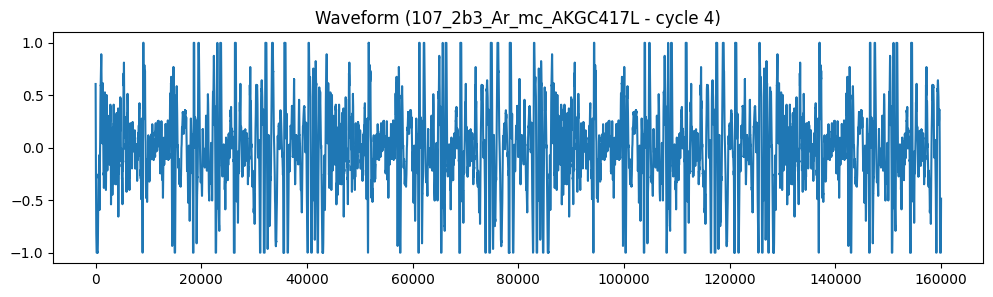

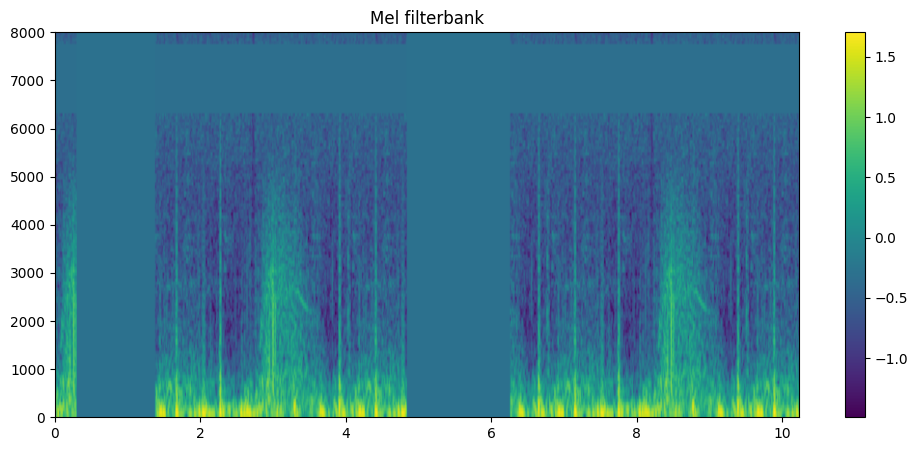

In [9]:
# --- Inspect one sample ---
idx = torch.randint(cfg.dataset.batch_size, (1,)).item()
print(f"Inspecting sample index {idx} in the batch")
print("Keys:", batch.keys())
print("Filename:", batch["filename"][idx])
print("Cycle index:", batch["cycle_index"][idx])
print("Label:", batch["label"][idx])
print("Duration:", batch["duration"][idx])
print("Start-End:", batch["start_time"][idx], "-", batch["end_time"][idx])
print("Crackle/Wheeze:", batch["crackle"][idx], batch["wheeze"][idx])
# print(sample["aug_audio"].shape, sample["aug_fbank"].shape, sample["audio"].shape, sample["fbank"].shape)
print("Waveform shape:", batch["audio"][idx].shape)
print("Mel image shape:", batch["input_values"][idx].shape)
# print(f"Waveform augmented: {not tensors_equal(batch['audio'][idx].view(-1), batch['aug_audio'][idx].view(-1))}")
# print(f"Mel augmented: {not tensors_equal(batch['fbank'][idx].view(-1), batch['aug_fbank'][idx].view(-1))}")

# --- 4. Plot waveform ---
waveform = batch["audio"][idx].squeeze().numpy()
plt.figure(figsize=(12, 3))
plt.plot(waveform)
plt.title(f"Waveform ({batch['filename'][idx]} - cycle {batch['cycle_index'][idx]})")
plt.show()

# --- 5. Plot mel spectrogram ---
mel = batch["input_values"][idx].squeeze(0)  # [freq, time] for imshow
freq_axis = np.linspace(0, cfg.audio.sample_rate // 2, mel.shape[0])
time_axis = np.arange(mel.shape[1]) * cfg.audio.frame_shift / 1000  # in seconds
plt.figure(figsize=(12, 5))
plt.imshow(mel, origin="lower", aspect="auto", extent=[0, time_axis[-1], 0, freq_axis[-1]], cmap="viridis")
plt.title("Mel filterbank")
plt.colorbar()
plt.show()

ipd.Audio(waveform, rate=cfg.audio.sample_rate)  # listen to the sound

In [13]:
from ls.data.dataloaders import compute_and_cache_stats

mean, std = compute_and_cache_stats(
    train_loader.dataset, cache_file="train_stats.json", batch_size=cfg.dataset.batch_size, 
    num_workers=cfg.dataset.num_workers
)
print(f"Dataset mean: {mean:.4f}, std: {std:.4f}")

[Stats] Computing dataset-wide mean/std...


100%|██████████| 130/130 [00:29<00:00,  4.38it/s]

[Stats] Cached mean=-0.7546, std=0.7734 to train_stats.json
Dataset mean: -0.7546, std: 0.7734


## Stratified Grouped KFold Dataloader

In [14]:
from ls.data.dataloaders import build_train_val_kfold

In [15]:
# Or: k-fold CV on train set
folds, test_loader = build_train_val_kfold(
    cfg.dataset, cfg.audio, n_splits=5, max_retries=50, seed=cfg.seed
)

[Transforms] Input spectrogram resize factor: 1.0, target size: (128, 1024)


/opt/homebrew/Caskroom/miniconda/base/envs/icbhi-ast/lib/python3.11/site-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(


[ICBHI] Extracted 4142 respiratory cycles from 539 recordings
[ICBHI] Input spectrogram shape: (997, 128, 1)
[ICBHI] 4142 cycles (base cycles only, aug handled dynamically)
  Class 0: 2063 (49.8%)
  Class 1: 1215 (29.3%)
  Class 2: 501 (12.1%)
  Class 3: 363 (8.8%)
[ICBHI] Active waveform augmentations: Loudness, VTLP
[ICBHI] Active spectrogram augmentations: SpecAugment
[ICBHI] Expected P(augmented) ≈ 0.43 (~1793/4142 per epoch)
[Transforms] Input spectrogram resize factor: 1.0, target size: (128, 1024)


/opt/homebrew/Caskroom/miniconda/base/envs/icbhi-ast/lib/python3.11/site-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(


[ICBHI] Extracted 2756 respiratory cycles from 381 recordings
[ICBHI] Input spectrogram shape: (997, 128, 1)
[ICBHI] 2756 cycles (base cycles only, aug handled dynamically)
  Class 0: 1579 (57.3%)
  Class 1: 649 (23.5%)
  Class 2: 385 (14.0%)
  Class 3: 143 (5.2%)
[ICBHI] No waveform augmentations
[ICBHI] No spectrogram augmentations

[KFold] Fold 1/5 (attempt 1)
  Class 0: train=1512, val=551
  Class 1: train=1042, val=173
  Class 2: train=367, val=134
  Class 3: train=253, val=110

[KFold] Fold 2/5 (attempt 1)
  Class 0: train=1842, val=221
  Class 1: train=1102, val=113
  Class 2: train=436, val=65
  Class 3: train=317, val=46

[KFold] Fold 3/5 (attempt 1)
  Class 0: train=1678, val=385
  Class 1: train=1060, val=155
  Class 2: train=444, val=57
  Class 3: train=345, val=18

[KFold] Fold 4/5 (attempt 1)
  Class 0: train=1722, val=341
  Class 1: train=741, val=474
  Class 2: train=408, val=93
  Class 3: train=220, val=143

[KFold] Fold 5/5 (attempt 1)
  Class 0: train=1498, val=565
 

In [16]:
for i, (train_loader, val_loader) in enumerate(folds):
    # print(f"Training fold {i+1}")
    for batch in train_loader:
        # Process each batch
        print(batch["input_values"].shape, batch["label"].shape, batch["filename"])
        break

/opt/homebrew/Caskroom/miniconda/base/envs/icbhi-ast/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


torch.Size([32, 1, 128, 1024]) torch.Size([32]) ['191_2b2_Tc_mc_LittC2SE', '201_1b3_Al_sc_Meditron', '107_3p2_Ll_mc_AKGC417L', '218_1p1_Pr_sc_Litt3200', '130_2b2_Pr_mc_AKGC417L', '130_2b4_Ll_mc_AKGC417L', '188_1b1_Ar_sc_Meditron', '219_2b3_Tc_mc_LittC2SE', '188_1b1_Tc_sc_Meditron', '154_1b3_Lr_mc_AKGC417L', '130_1p2_Al_mc_AKGC417L', '167_1b1_Pr_sc_Meditron', '130_3p2_Tc_mc_AKGC417L', '138_1p4_Ar_mc_AKGC417L', '137_1b1_Ll_sc_Meditron', '135_2b3_Al_mc_LittC2SE', '110_1p1_Ll_sc_Meditron', '130_2p5_Tc_mc_AKGC417L', '135_2b3_Pl_mc_LittC2SE', '192_2b1_Ar_mc_LittC2SE', '130_2b2_Ll_mc_AKGC417L', '204_7p5_Tc_mc_AKGC417L', '141_1b2_Pr_mc_LittC2SE', '130_3p4_Pl_mc_AKGC417L', '131_1b1_Al_sc_Meditron', '114_1b4_Ar_mc_AKGC417L', '138_2p2_Tc_mc_AKGC417L', '204_2b5_Ll_mc_AKGC417L', '163_8b3_Al_mc_AKGC417L', '154_1b3_Ar_mc_AKGC417L', '201_1b3_Ar_sc_Meditron', '110_1b1_Pr_sc_Meditron']
torch.Size([32, 1, 128, 1024]) torch.Size([32]) ['162_2b4_Al_mc_AKGC417L', '130_2b4_Al_mc_AKGC417L', '107_2b3_Al_mc_AKG